In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES


In [11]:
key = get_random_bytes(16)
test_block = get_random_bytes(16)
cipher = AES.new(key, AES.MODE_ECB)
target = cipher.encrypt(test_block)

In [12]:
def hd(bytes1, bytes2):
    t1, t2 = bytes1.hex(), bytes2.hex()
    t1, t2 = int(t1, 16), int(t2, 16)
    
    res = t1 ^ t2
    return bin(res).count('1')
    
    
block_hex = int(test_block.hex(), 16)
i = 1
xor = 1

distances = []

amount = len(bin(block_hex))

while xor < block_hex:

    print(f'\rВиконано: {i / amount}%', end='')
    
    tmp_hex = block_hex ^ xor
    try:
        tmp_block = bytes.fromhex(hex(tmp_hex)[2:])
    except Exception as e:
        tmp_block = bytes.fromhex('0'+hex(tmp_hex)[2:])
    tmp_res = cipher.encrypt(tmp_block)
    distances.append(hd(target, tmp_res))
    i += 1
    xor = 1 << i

Done: 0.9765625%

(array([ 1.,  1.,  0.,  1.,  0.,  2.,  7.,  3.,  0.,  2.,  1.,  5., 12.,
         0., 12.,  7.,  8.,  0.,  8., 10., 11.,  3.,  0., 10.,  8.,  4.,
         0.,  1.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([51.   , 51.775, 52.55 , 53.325, 54.1  , 54.875, 55.65 , 56.425,
        57.2  , 57.975, 58.75 , 59.525, 60.3  , 61.075, 61.85 , 62.625,
        63.4  , 64.175, 64.95 , 65.725, 66.5  , 67.275, 68.05 , 68.825,
        69.6  , 70.375, 71.15 , 71.925, 72.7  , 73.475, 74.25 , 75.025,
        75.8  , 76.575, 77.35 , 78.125, 78.9  , 79.675, 80.45 , 81.225,
        82.   ]),
 <BarContainer object of 40 artists>)

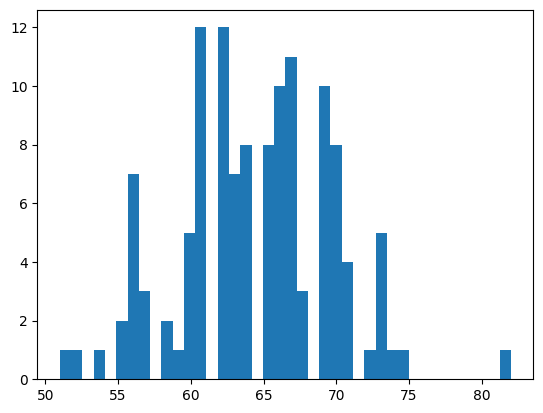

In [13]:
plt.hist(distances, bins=40)

In [14]:
np.mean(distances)

64.456

In [15]:
min(distances)

51